In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.stattools import adfuller


import warnings
warnings.filterwarnings(action='ignore')

In [17]:
birthdf = pd.read_csv('../../99_raw_data/daily-total-female-births.txt',
                      index_col='Date',
                      parse_dates=['Date']
                      )
# birthdf.index = pd.to_datetime(birthdf.index, format='%Y-%m-%d')

In [18]:
tempDF = pd.read_csv('../../99_raw_data/daily-min-temperatures.csv',
                     index_col='date',parse_dates=['date'])

In [19]:
airDF = pd.read_csv('../../99_raw_data/international-airline-passengers.txt',
                     index_col='time',parse_dates=['time'])

In [20]:
n = len(birthdf)//2
n

182

### Stationary

In [21]:
n = len(birthdf)//2
n

182

In [22]:
print(birthdf.iloc[:n].mean())
print(birthdf.iloc[:n].var())

Births    39.763736
dtype: float64
Births    49.485308
dtype: float64


In [23]:
print(birthdf.iloc[n:].mean())
print(birthdf.iloc[n:].var())

Births    44.185792
dtype: float64
Births    48.976281
dtype: float64


### Non Stationary

In [24]:
n = len(tempDF)//2
n
print(tempDF.iloc[:n].mean())
print(tempDF.iloc[:n].var())
print(tempDF.iloc[n:].mean())
print(tempDF.iloc[n:].var())

Temp    11.043507
dtype: float64
Temp    18.170782
dtype: float64
Temp    11.312
dtype: float64
Temp    14.961956
dtype: float64


In [25]:
n = len(airDF)//2
n
print(airDF.iloc[:n].mean())
print(airDF.iloc[:n].var())
print(airDF.iloc[n:].mean())
print(airDF.iloc[n:].var())

passengers    182.902778
dtype: float64
passengers    2275.69464
dtype: float64
passengers    377.694444
dtype: float64
passengers    7471.736307
dtype: float64


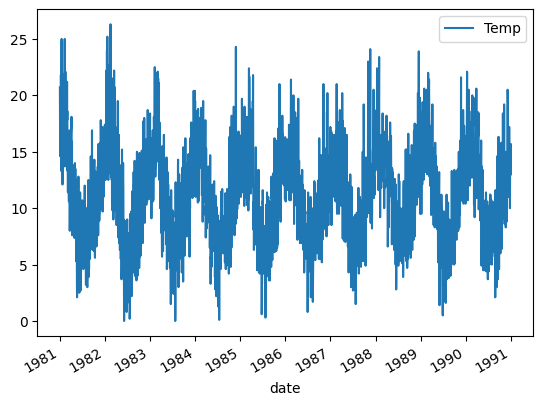

In [27]:
tempDF.plot()
plt.show()

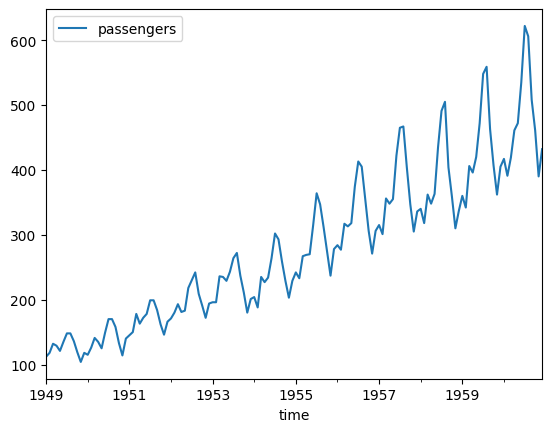

In [28]:
airDF.plot()
plt.show()

### 자기상관계수
#### Autocorrelation

In [31]:
tempDF['days'] = range(0,len(tempDF))

In [33]:
temps=tempDF['Temp'].values
temps

array([20.7, 17.9, 18.8, ..., 13.5, 15.7, 13. ])

In [35]:
# 2~ end
temps[1:]

array([17.9, 18.8, 14.6, ..., 13.5, 15.7, 13. ])

In [36]:
# 1 ~ end-1
temps[:-1]

array([20.7, 17.9, 18.8, ..., 13.6, 13.5, 15.7])

In [37]:
# autocorrelation => lag 1
np.corrcoef(temps[1:],temps[:-1])

array([[1.        , 0.77487022],
       [0.77487022, 1.        ]])

In [38]:
# autocorrelation => lag 2
np.corrcoef(temps[2:],temps[:-2])

array([[1.        , 0.63111946],
       [0.63111946, 1.        ]])

In [39]:
# autocorrelation => lag 3
np.corrcoef(temps[3:],temps[:-3])

array([[1.        , 0.58637486],
       [0.58637486, 1.        ]])

In [42]:
autocorrelation = list()
for shift in range(1,10):
    c = np.corrcoef(temps[:-shift],temps[shift:])[0,1]
    autocorrelation.append(c)

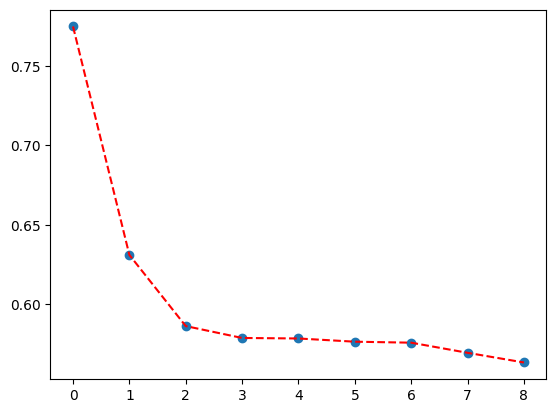

In [45]:
plt.scatter(range(0,len(autocorrelation)),autocorrelation)
plt.plot(range(0,len(autocorrelation)),autocorrelation,'--r')
plt.show()

In [46]:
# by library
from statsmodels.graphics.tsaplots import plot_acf, acf

In [47]:
result = acf(tempDF['Temp'])
result

array([1.        , 0.774268  , 0.6302866 , 0.58529312, 0.57774567,
       0.57728013, 0.57510412, 0.57437039, 0.56782622, 0.56120131,
       0.54668689, 0.53793111, 0.54012564, 0.54247126, 0.53688723,
       0.53429917, 0.53043593, 0.52911166, 0.53037444, 0.52280732,
       0.52303677, 0.52224579, 0.51426684, 0.49837745, 0.49302665,
       0.49946731, 0.50428521, 0.50068173, 0.49157081, 0.48146406,
       0.47421245, 0.47568054, 0.46311862, 0.46215585, 0.46630567,
       0.45459092])

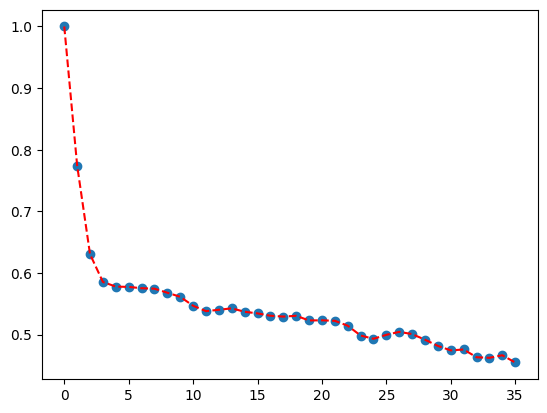

In [48]:
plt.scatter(range(0,len(result)),result)
plt.plot(range(0,len(result)),result,'--r')
plt.show()

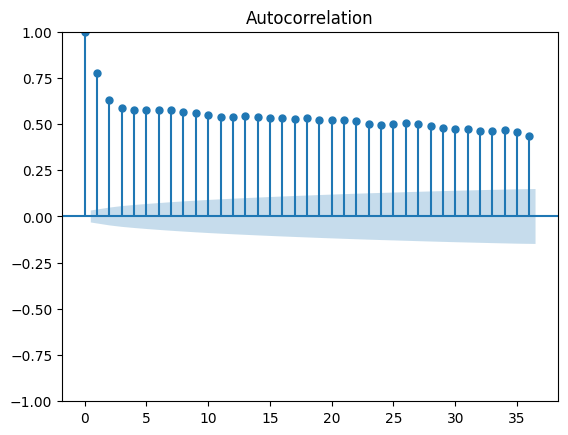

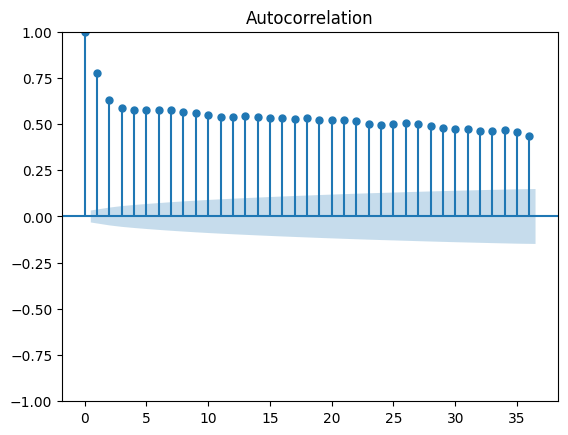

In [49]:
plot_acf(tempDF['Temp'])

### adfuller 판단지표
- 검증조건 (p_value 5% 이내면 기각)
- 귀무가설 : non-stationary
- 대립가설 : stationary

In [52]:
from statsmodels.tsa.stattools import adfuller

In [53]:
result = adfuller(birthdf['Births'])
result

(-4.808291253559764,
 5.2434129901498554e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 2343.8290926464197)

In [54]:
print('adf => 적을수록 귀무가설을 기각시킬 확률이 높다')
print(result[0])
print('=='*50)
print('p_value 0.05 이하면 귀무가설 기각')
print(result[1])

adf => 적을수록 귀무가설을 기가시킬 확률이 높다
-4.808291253559764
p_value 귀무가설 기각
5.2434129901498554e-05


In [55]:
result = adfuller(airDF['passengers'])
print('adf => 적을수록 귀무가설을 기각시킬 확률이 높다')
print(result[0])
print('=='*50)
print('p_value 0.05 이하면 귀무가설 기각')
print(result[1])

adf => 적을수록 귀무가설을 기가시킬 확률이 높다
0.8153688792060529
p_value 귀무가설 기각
0.9918802434376411


In [58]:
result = adfuller(tempDF['Temp'])
print('adf => 적을수록 귀무가설을 기각시킬 확률이 높다')
print(result[0])
print('=='*50)
print('p_value 0.05 이하면 귀무가설 기각')
print(result[1])

adf => 적을수록 귀무가설을 기가시킬 확률이 높다
-4.444804924611704
p_value 0.05 이하면 귀무가설 기각
0.0002470826300360942


<AxesSubplot: xlabel='date'>

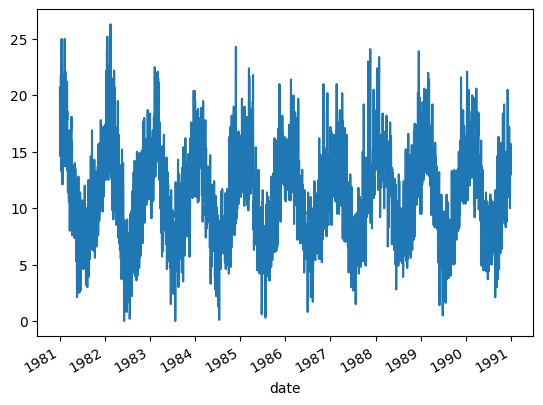

In [60]:
tempDF['Temp'].plot()

### ARIMA
- AR : AutoRegressive
-   - Long Term
-   - p
- I : Intergration Filter
-   - Stochastic trend
-   - d
- MA : MovingAverage
-   - Short Term
-   - q

* ARMA (Auto_Regressive Moving_Average)

* ARIMA (Auto_Regressive Integration_Filter Moving_Average)

In [85]:
model = ARIMA(airDF, order=(2,1,2) ) #(p,d,q)
rfit = model.fit()
rfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Mon, 12 Dec 2022   AIC                           1353.347
Time:                        14:42:48   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.060      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.815      0.000      -2.087      -1.599
ma.L2          0.9953      0.135      7.383      0.000       0.731       1.260
sigma2       665.9595    114.027      5.840      0.000     442.470     889.449
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.59   Prob(JB):                         0.40
Heteroskedasticity (H):               7.38   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
"""
AIC는 주어진 데이터 셋에 대한 통계 모델의 상대적인 품질을 평가하는 것이다. 
AIC 값은 낮을수록 좋다
"""

In [87]:
def arima_aic_check(data, order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_list = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p:{p} d:{d} q:{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df

In [89]:
arima_aic_check(airDF,order=(3,3,3))

,order,AIC
23,p:2 d:1 q:2,1353.346641
22,p:2 d:1 q:1,1378.338320
14,p:1 d:1 q:2,1385.497545
17,p:1 d:2 q:2,1391.908471
26,p:2 d:2 q:2,1392.656889
25,p:2 d:2 q:1,1393.886573
8,p:0 d:2 q:2,1394.372844
13,p:1 d:1 q:1,1394.682505
21,p:2 d:1 q:0,1396.587695
5,p:0 d:1 q:2,1397.093462


In [92]:
# index based predict
rfit.predict(start=1,end=10,typ='levels')

pandas.core.series.Series

In [95]:
rfit.predict(start = '1950-01-01', end = '1950-12-01', typ = 'levels')

1950-01-01    121.156922
1950-02-01    120.594788
1950-03-01    132.840020
1950-04-01    146.351321
1950-05-01    137.425721
1950-06-01    125.610437
1950-07-01    146.731469
1950-08-01    162.647320
1950-09-01    158.158777
1950-10-01    144.754859
1950-11-01    122.915554
1950-12-01    110.900812
Freq: MS, Name: predicted_mean, dtype: float64

In [117]:
temp=rfit.predict(start = '1959-07-01', end = '1960-07-01', typ = 'levels')

In [118]:
train=airDF.loc[:'1959-07-01',:]
test=airDF.loc['1959-07-01':,:]

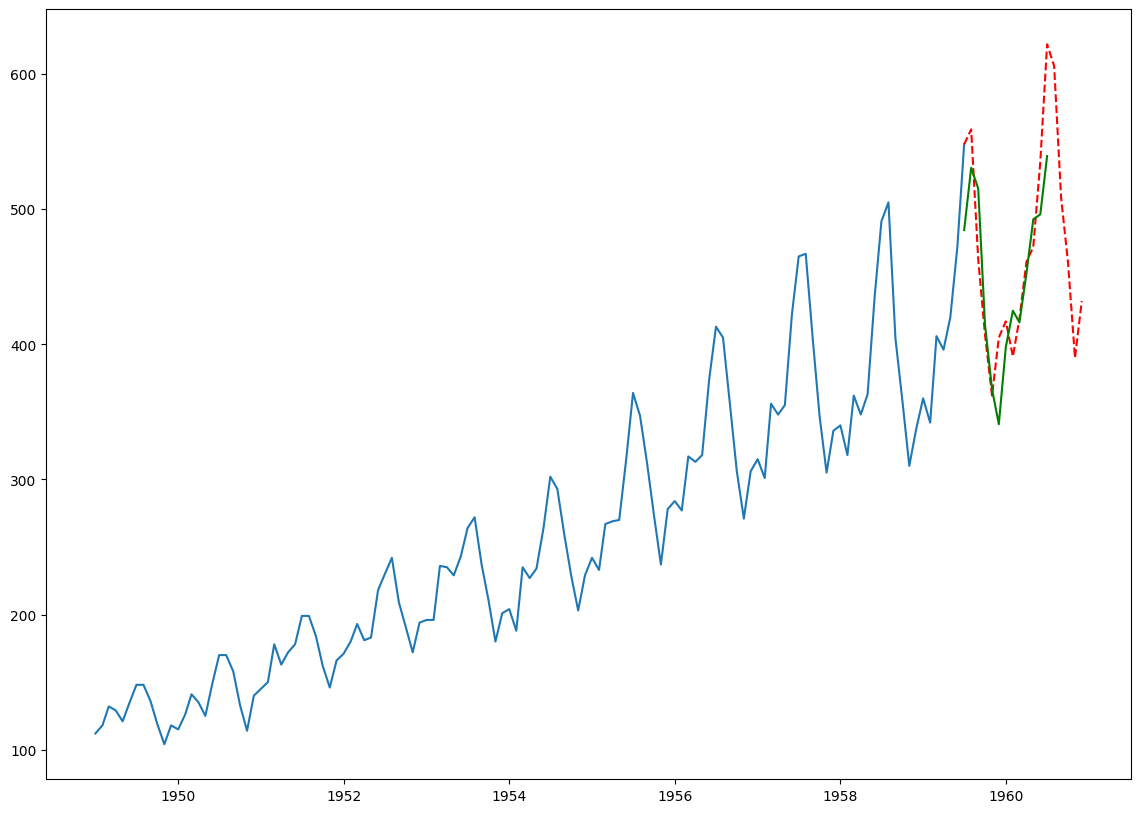

In [119]:
plt.figure(figsize=(14,10))
plt.plot(train)
plt.plot(test,'--r')
plt.plot(temp, '-g')

plt.show()

#### prob


In [126]:
df = pd.DataFrame([
        ['2001-11-01', 0.998543],
        ['2001-11-02', 1.914526],
        ['2001-11-03', 3.057407],
        ['2001-11-04', 4.044301],
        ['2001-11-05', 4.952441],
        ['2001-11-06', 6.002932],
        ['2001-11-07', 6.930134],
        ['2001-11-08', 8.011137],
        ['2001-11-09', 9.040393],
        ['2001-11-10', 10.097007],
        ['2001-11-11', 11.063742],
        ['2001-11-12', 12.051951],
        ['2001-11-13', 13.062637],
        ['2001-11-14', 14.086016],
        ['2001-11-15', 15.096826],
        ['2001-11-16', 15.944886],
        ['2001-11-17', 17.027107],
        ['2001-11-18', 17.930240],
        ['2001-11-19', 18.984202],
        ['2001-11-20', 19.971603]
    ], columns=['date', 'count'])
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
df = df.set_index('date')
print(df)

                count
date                 
2001-11-01   0.998543
2001-11-02   1.914526
2001-11-03   3.057407
2001-11-04   4.044301
2001-11-05   4.952441
2001-11-06   6.002932
2001-11-07   6.930134
2001-11-08   8.011137
2001-11-09   9.040393
2001-11-10  10.097007
2001-11-11  11.063742
2001-11-12  12.051951
2001-11-13  13.062637
2001-11-14  14.086016
2001-11-15  15.096826
2001-11-16  15.944886
2001-11-17  17.027107
2001-11-18  17.930240
2001-11-19  18.984202
2001-11-20  19.971603
